In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from haversine import haversine

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### 타이타닉 생존자

In [8]:
data1 = sm.datasets.get_rdataset("Titanic", package="datasets")

In [22]:
df1 = data1.data
df1.tail()

,Name,PClass,Age,Sex,Survived,SexCode
1308,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0,0
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [10]:
print(data1.__doc__)

+-----------+-------------------+
| Titanic   | R Documentation   |
+-----------+-------------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+------+------------+-----------------------+
| No   | Name       | Levels                |
+------+------------+-----------------------+
| 1    | Class      | 1st, 2nd, 3rd, Crew   |
+------+------------+-----------------------+
| 2    | Sex        | Male, Female          |
+------+------------+-----------------------+
| 3    | Age        | Child, Adult          |
+------+------------+-----------------------+
| 4    | 

##### 미국 강수량

In [11]:
data2 = sm.datasets.get_rdataset("precip")

In [12]:
print(data2.__doc__)

+----------+-------------------+
| precip   | R Documentation   |
+----------+-------------------+

Annual Precipitation in US Cities
---------------------------------

Description
~~~~~~~~~~~

The average amount of precipitation (rainfall) in inches for each of 70
United States (and Puerto Rico) cities.

Usage
~~~~~

::

    precip

Format
~~~~~~

A named vector of length 70.

Note
~~~~

The dataset version up to Nov.16, 2016 had a typo in ``"Cincinnati"``'s
name. The examples show how to recreate that version.

Source
~~~~~~

Statistical Abstracts of the United States, 1975.

References
~~~~~~~~~~

McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

Examples
~~~~~~~~

::

    require(graphics)
    dotchart(precip[order(precip)], main = "precip data")
    title(sub = "Average annual precipitation (in.)")

    ## Old ("wrong") version of dataset (just name change):
    precip.O <- local({
       p <- precip; names(p)[names(p) == "Cincinnati"] <- "Cincinati" ; p })
    s

In [21]:
df2 = data2.data
df2.tail()

,x
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


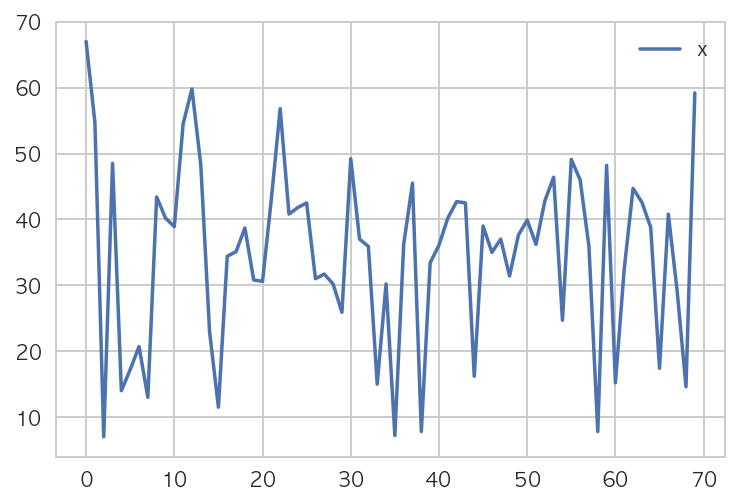

In [23]:
df2.plot()
plt.show()

##### 황체형성 호르몬 수치 시계열

In [18]:
data3 = sm.datasets.get_rdataset("lh")

In [19]:
print(data3.__doc__)

+------+-------------------+
| lh   | R Documentation   |
+------+-------------------+

Luteinizing Hormone in Blood Samples
------------------------------------

Description
~~~~~~~~~~~

A regular time series giving the luteinizing hormone in blood samples at
10 mins intervals from a human female, 48 samples.

Usage
~~~~~

::

    lh

Source
~~~~~~

P.J. Diggle (1990) *Time Series: A Biostatistical Introduction.* Oxford,
table A.1, series 3



In [20]:
df3 = data3.data
df3.tail()

,time,lh
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


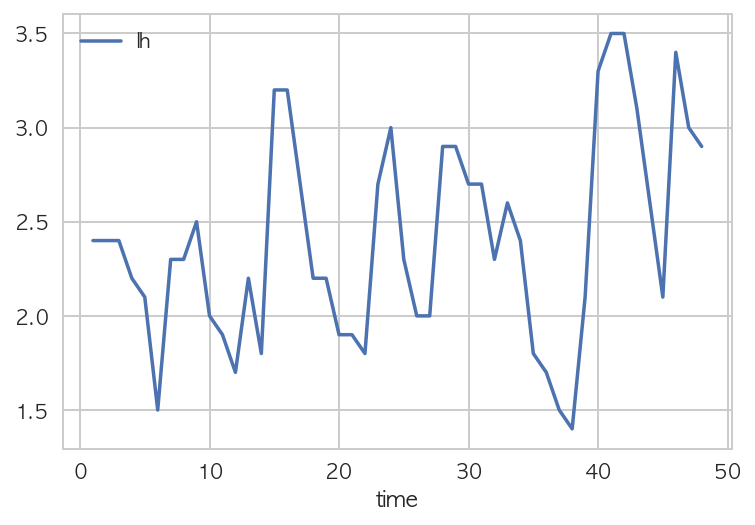

In [24]:
df3.plot(x="time",y="lh")
plt.show()

##### 호흡기질환 사망자수

In [25]:
data4 = sm.datasets.get_rdataset("deaths", "MASS")

In [26]:
print(data4.__doc__)

+----------+-------------------+
| deaths   | R Documentation   |
+----------+-------------------+

Monthly Deaths from Lung Diseases in the UK
-------------------------------------------

Description
~~~~~~~~~~~

A time series giving the monthly deaths from bronchitis, emphysema and
asthma in the UK, 1974-1979, both sexes (``deaths``),

Usage
~~~~~

::

    deaths

Source
~~~~~~

P. J. Diggle (1990) *Time Series: A Biostatistical Introduction.*
Oxford, table A.3

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics with
S.* Fourth edition. Springer.

See Also
~~~~~~~~

This the same as dataset ``ldeaths`` in **R**'s datasets package.



In [27]:
df4 = data4.data
df4.tail()

,time,deaths
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [32]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction -year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [33]:
df4["datetime"] = df4.time.map(yearfraction2datetime)
df4.tail()

,time,deaths,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


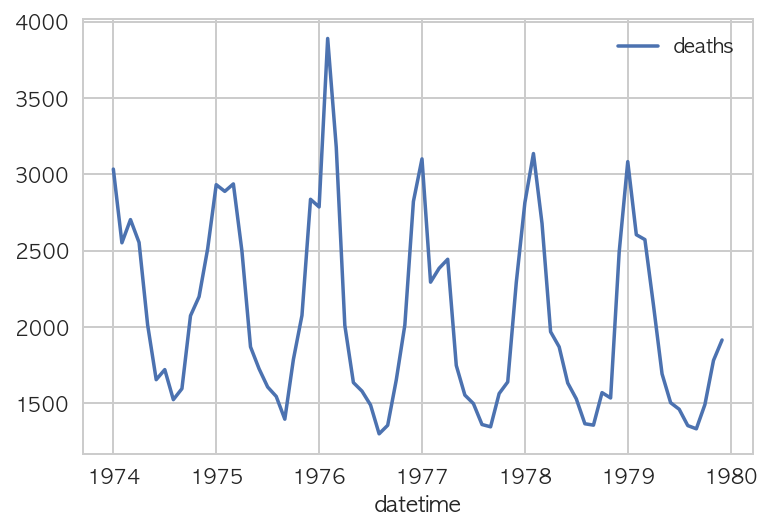

In [34]:
df4.plot(x="datetime", y="deaths")
plt.show()

##### 항공 운송인원

In [37]:
data5 = sm.datasets.get_rdataset("AirPassengers")

In [38]:
print(data5.__doc__)

+-----------------+-------------------+
| AirPassengers   | R Documentation   |
+-----------------+-------------------+

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

    AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)

    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24

In [39]:
df5 = data5.data
df5.tail()

,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [40]:
df5["datetime"] = df5.time.map(yearfraction2datetime)
df5.tail()

,time,AirPassengers,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


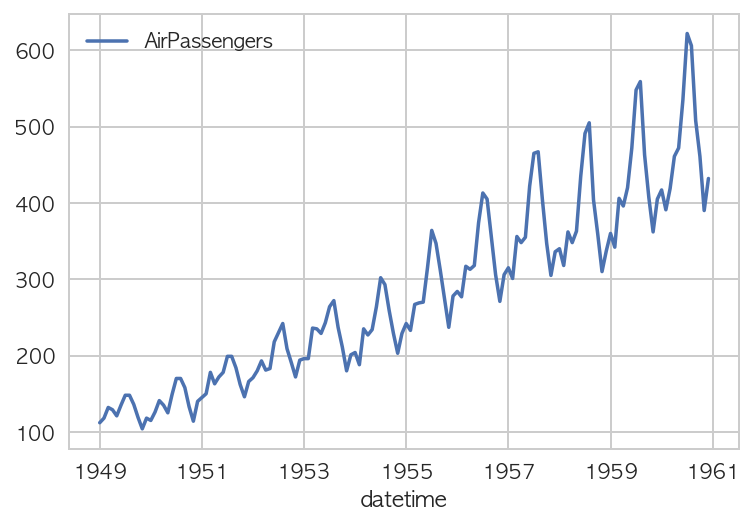

In [41]:
df5.plot(x="datetime", y="AirPassengers")
plt.show()